# 5. Tutorial 3: Epidemiology model

#### Naoki TANI
#### Center for Advanced Policy Studies (CAPS), Institute of Economic Research, Kyoto University
#### April 25, 2024

In [1]:
import numpy as np
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

## 1. Simple SIR model

#### There is a continuum of agents of mass $N$. Each agent can be either "Susceptible" ($S$), "Infected" ($I$) or "Recovered" ($R$).
#### $S_t$ represents the number of people at time $t$ who are susceptible to the disease infection. 
#### $I_t$ is the number of infected agents at time $t$ who recover with probability $\gamma$ and die with probability $\delta$.
#### $R_t$ is the number of agents at time $t$ who recovered from the infected state.
#### In each period, one agent meets another agent drawn randomly. If Susceptible agents meet an Infected agent, they always catch the disease. $\beta$ is the rate at which agents are exposed to infected people. For sake of simplicity, Recovered agents never get infected with the disease even when they meet Infected agents.

#### The model can be writen as:

$S_{t} = S_{t-1} - \frac{\beta S_{t-1}I_{t-1}}{N_{t}}$

$I_{t} = I_{t-1} + \frac{\beta S_{t-1}I_{t-1}}{N_{t}} - \delta I_{t-1} - \gamma I_{t-1}$

$R_{t} =  R_{t-1} + \gamma I_{t-1}$

$ N_{t} = S_{t} + I_{t} + R_{t}$ 

In [2]:
class Parameters:
    def __init__(self, β1, β2, δ, γ, T):
        self.β1 = β1 #infection rate without lockdown
        self.β2 = β2 #infection rate in lockdown case
        self.δ = δ #death rate
        self.γ = γ #recovery rate
        self.T = T #total periods
p = Parameters(0.2, 0.1, 0.01, 0.014, 500)

In [3]:
# define the transition function
def f(s, p):
    S_t, I_t, R_t = s #initial state
    S_tt = S_t - p.β1 * S_t * I_t / (S_t + I_t + R_t)
    I_tt = I_t + p.β1 * S_t * I_t / (S_t + I_t + R_t) - p.δ * I_t - p.γ * I_t
    R_tt = R_t + p.γ * I_t
    return S_tt, I_tt, R_tt

In [4]:
f([10.0, 5.0, 5.0],p) 

(9.5, 5.38, 5.07)

In [5]:
# simulate the transitions over T periods
def simulate(v0, f, p):
    sim = list([v0])
    for t in range(p.T):
        v1 = f(sim[-1], p)
        sim.append(v1)
    return np.array(sim).T # transpose a (T+1, 3) matrix to a (3, T+1) matrix

In [6]:
v0 = [10.0, 2.0, 0.0] #initial state
sim1 = simulate(v0, f, p)
sim1

#np.array(sim1).shape

array([[1.00000000e+01, 9.66666667e+00, 9.29785940e+00, ...,
        1.23771986e-04, 1.23771674e-04, 1.23771370e-04],
       [2.00000000e+00, 2.28533333e+00, 2.59929260e+00, ...,
        8.80915831e-05, 8.59776967e-05, 8.39145360e-05],
       [0.00000000e+00, 2.80000000e-02, 5.99946667e-02, ...,
        6.99987641e+00, 6.99987765e+00, 6.99987885e+00]])

In [7]:
sim1[0,0:10]

array([10.        ,  9.66666667,  9.2978594 ,  8.89361819,  8.45514471,
        7.98498861,  7.48716175,  6.96714468,  6.43175639,  5.88887501])

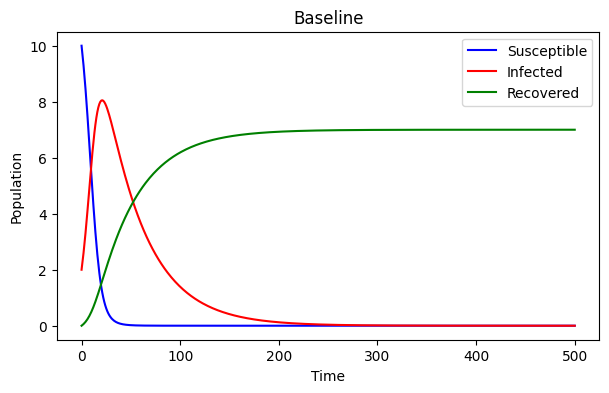

In [8]:
plt.figure(figsize=(7, 4))
plt.plot(range(p.T+1), sim1[0], label='Susceptible', color='blue')
plt.plot(range(p.T+1), sim1[1], label='Infected', color='red')
plt.plot(range(p.T+1), sim1[2], label='Recovered', color='green')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Baseline')
plt.legend(loc='upper right')
plt.show()

## 2. Exercises

#### $\mathit{Q}$-1. Simulate the transition of the scenario that the government implements lockdown to reduce the infection rate.

In [9]:
# define the transition function
def l(s, p):
    

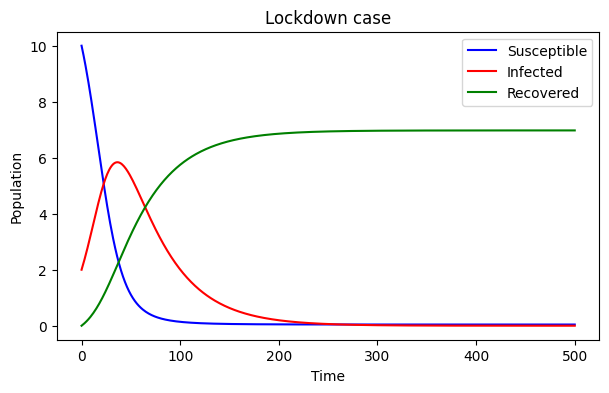

In [10]:
sim2 = simulate(v0,l,p)

plt.figure(figsize=(7, 4))
plt.plot(range(p.T+1), sim2[0], label='Susceptible', color='blue')
plt.plot(range(p.T+1), sim2[1], label='Infected', color='red')
plt.plot(range(p.T+1), sim2[2], label='Recovered', color='green')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lockdown case')
plt.legend(loc='upper right')
plt.show()

#### $\mathit{Q}$-2. Plot the cumulative number of deaths for each of the $20$ scenarios with varying values of $\beta$ by using `for loop`. 

In [11]:
# redefine the transition function
def fn(s, β):
    
    return S_tt, I_tt, R_tt, death

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02      , 0.02      , 0.02      , ..., 0.02      , 0.02      ,
        0.02      ],
       [0.03968529, 0.03985058, 0.04001587, ..., 0.04249521, 0.0426605 ,
        0.04282579],
       ...,
       [1.27053653, 2.2122562 , 3.49111152, ..., 4.99977091, 4.99985647,
        4.99990447],
       [1.27054395, 2.21239791, 3.49135526, ..., 4.99977183, 4.99985737,
        4.99990536],
       [1.27055126, 2.21253814, 3.49159621, ..., 4.99977273, 4.99985825,
        4.99990622]])

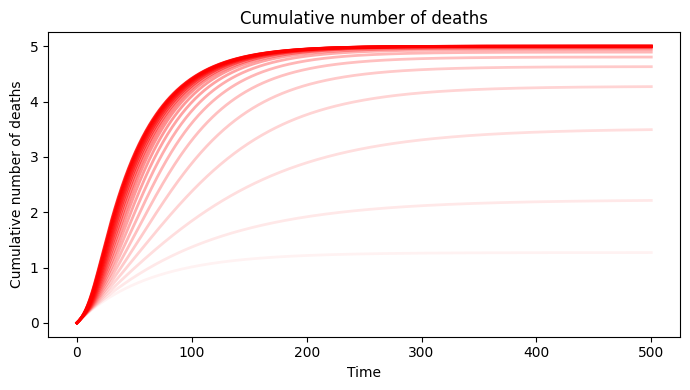

In [15]:
plt.figure(figsize=(7, 4))
for i in range(len(β_range)):
    plt.plot(np.arange(p.T+1), simulation[:,i], color='red', alpha=np.linspace(0.05, 0.8, 20)[i], linewidth=2)
plt.xlabel("Time")
plt.ylabel("Cumulative number of deaths")
plt.title("Cumulative number of deaths")
plt.tight_layout()
plt.show()